In [1]:
from model import NeuralNetwork
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from persistable_model import PresistableModel


In [2]:
# useiden eri mnist datasettien jälkeen päädyin tähän pikkelöityyn
# https://www.kaggle.com/datasets/pablotab/mnistpklgz
from utilities import vectorize_label


with gzip.open('../data/mnist.pkl.gz', 'rb') as f:
    train_set, val_set, test_set = pickle.load(f, encoding='latin1')

X_train = [np.reshape(x, (784, 1)) for x in train_set[0]]
y_train = [vectorize_label(y) for y in train_set[1]]
X_val = [np.reshape(x, (784, 1)) for x in val_set[0]]
y_val = val_set[1]
X_test = [np.reshape(x, (784, 1)) for x in test_set[0]]
y_test = test_set[1]

In [3]:
def evalulate_model(m):
    results = []
    for x, y in zip(X_test, y_test):
        prediction, _, __ = m.predict(x)
        results.append(prediction == y)
    
    correct_predictions_count = np.array(results).sum()
    accuracy =  correct_predictions_count / len(results)
    
    print("Predicted {}/{} correct".format(correct_predictions_count, len(results)))
    print("Accuracy: {}".format(accuracy))
    
def plot_result(activation_function, evaluations):
    x = np.arange(-5, 5.1, 0.1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].plot(range(len(evaluations)), evaluations)
    axes[0].set_title("Epochs")

    axes[1].plot(x, activation_function.activation(x))
    axes[1].set_title("Activation function")

    plt.show()

# Sigmoid

Sigmoid on hyvä baselien aktivointi funktio.

Epoch 0 done
Predicted 9337/10000
Epoch 1 done
Predicted 9479/10000
Epoch 2 done
Predicted 9520/10000
Epoch 3 done
Predicted 9551/10000
Epoch 4 done
Predicted 9593/10000
Epoch 5 done
Predicted 9594/10000
Epoch 6 done
Predicted 9573/10000
Epoch 7 done
Predicted 9640/10000
Epoch 8 done
Predicted 9607/10000
Epoch 9 done
Predicted 9639/10000
Epoch 10 done
Predicted 9624/10000
Epoch 11 done
Predicted 9619/10000
Epoch 12 done
Predicted 9620/10000
Epoch 13 done
Predicted 9616/10000
Epoch 14 done
Predicted 9602/10000
Epoch 15 done
Predicted 9626/10000
Epoch 16 done
Predicted 9612/10000
Epoch 17 done
Predicted 9643/10000
Epoch 18 done
Predicted 9621/10000
Epoch 19 done
Predicted 9608/10000
Epoch 20 done
Predicted 9640/10000
Epoch 21 done
Predicted 9605/10000
Epoch 22 done
Predicted 9635/10000
Epoch 23 done
Predicted 9624/10000
Epoch 24 done
Predicted 9603/10000
Epoch 25 done
Predicted 9618/10000
Epoch 26 done
Predicted 9637/10000
Epoch 27 done
Predicted 9619/10000
Epoch 28 done
Predicted 9628/1

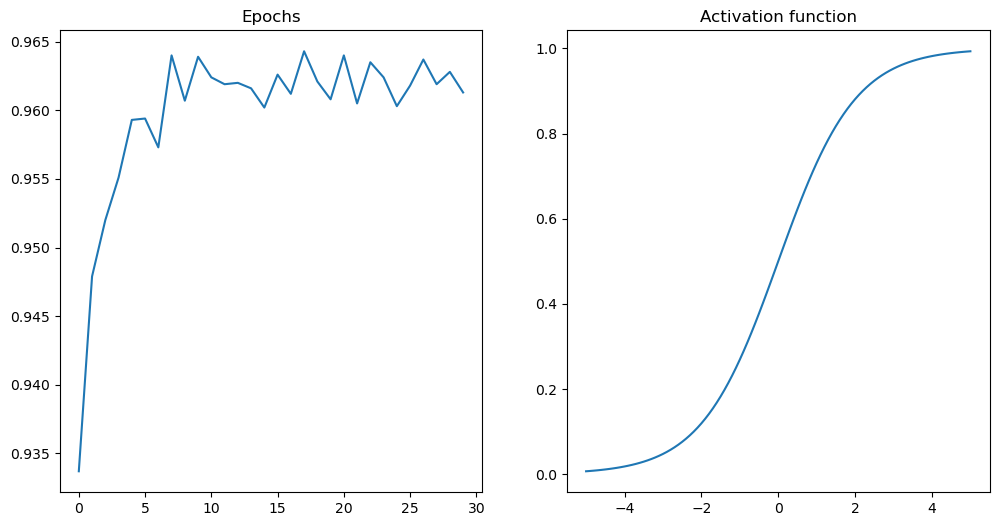

Predicted 9610/10000 correct
Accuracy: 0.961


In [4]:
from activation_funtions import Sigmoid


activation_function = Sigmoid()
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 2.0, 10)
plot_result(activation_function, evaluations)

# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

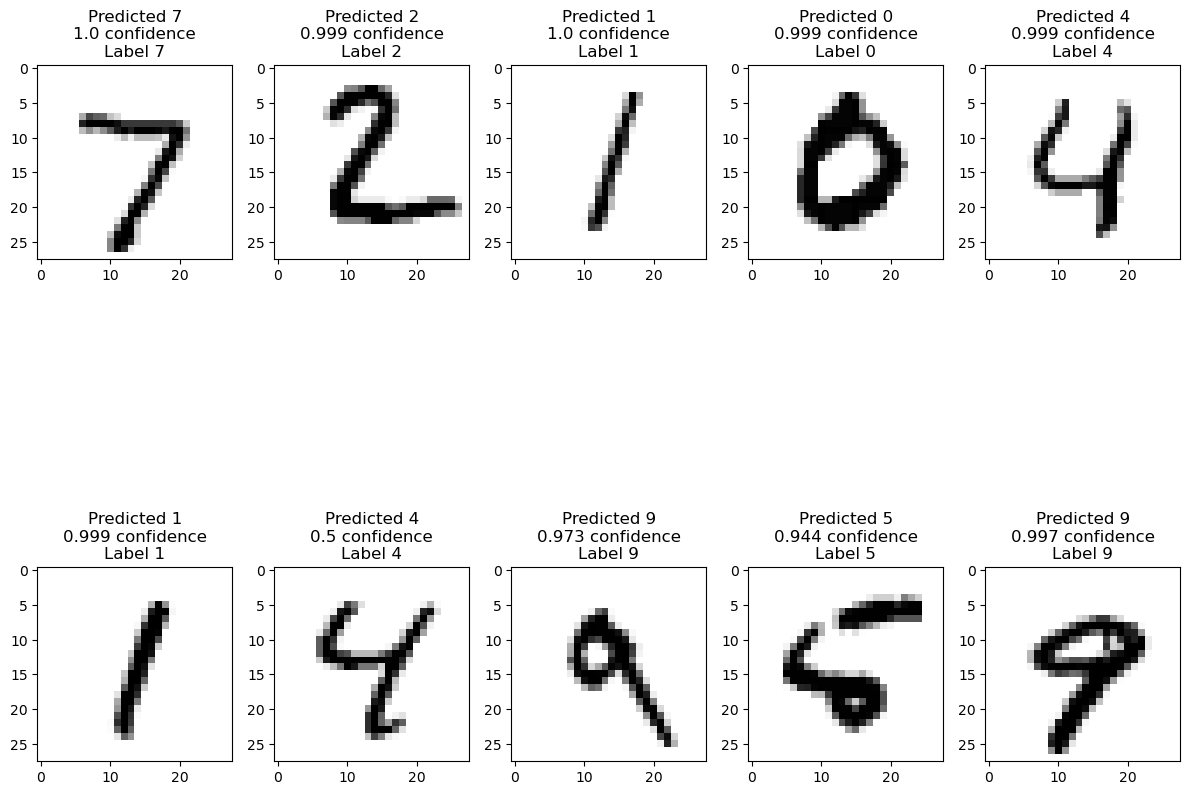

In [5]:
n_prediction = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 12))

def image_vector_to_matrix(v):
    n = int(np.sqrt(v.size))
    return v.reshape(n, n)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(image_vector_to_matrix(X_test[i]), cmap='gray_r')
    prediction, confidence, y = model.predict(X_test[i])
    ax.set_title('Predicted {}\n{} confidence\nLabel {}'.format(prediction, confidence, y_test[i]))

plt.tight_layout()
plt.show()


# ReLU

ReLU:n kanssa huomasin, jos learning rate on liian iso, neuronit kuolevat. Tämä johtuu siitä, ettei ReLU ole derivoituva nollassa. Kuitenkin pienemällä learning rate arvolla ReLU näyttää päätyvän johonkin minimiin.

Epoch 0 done
Predicted 6268/10000
Epoch 1 done
Predicted 6456/10000
Epoch 2 done
Predicted 6514/10000
Epoch 3 done
Predicted 7576/10000
Epoch 4 done
Predicted 8400/10000
Epoch 5 done
Predicted 8465/10000
Epoch 6 done
Predicted 8495/10000
Epoch 7 done
Predicted 8498/10000
Epoch 8 done
Predicted 8528/10000
Epoch 9 done
Predicted 8551/10000
Epoch 10 done
Predicted 8562/10000
Epoch 11 done
Predicted 8584/10000
Epoch 12 done
Predicted 8581/10000
Epoch 13 done
Predicted 8589/10000
Epoch 14 done
Predicted 8604/10000
Epoch 15 done
Predicted 8601/10000
Epoch 16 done
Predicted 8603/10000
Epoch 17 done
Predicted 8610/10000
Epoch 18 done
Predicted 8602/10000
Epoch 19 done
Predicted 8609/10000
Epoch 20 done
Predicted 8612/10000
Epoch 21 done
Predicted 8621/10000
Epoch 22 done
Predicted 8626/10000
Epoch 23 done
Predicted 8629/10000
Epoch 24 done
Predicted 8632/10000
Epoch 25 done
Predicted 8645/10000
Epoch 26 done
Predicted 8625/10000
Epoch 27 done
Predicted 8633/10000
Epoch 28 done
Predicted 8647/1

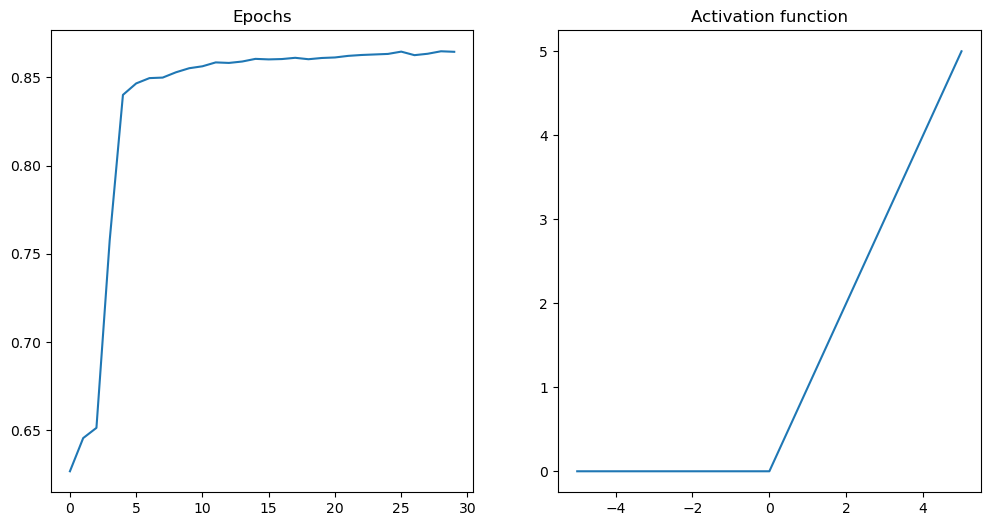

Predicted 8712/10000 correct
Accuracy: 0.8712


In [13]:
from activation_funtions import ReLU


activation_function = ReLU()
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)


# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

# Leaky ReLU

ReLU variantti, jossa negatiiviset arvot saavat loivan kulmakertoimen nollan sijaan vaikuttaa toimivan paremmin kuin vakio ReLU.

Epoch 0 done
Predicted 8933/10000
Epoch 1 done
Predicted 9176/10000
Epoch 2 done
Predicted 9275/10000
Epoch 3 done
Predicted 9340/10000
Epoch 4 done
Predicted 9394/10000
Epoch 5 done
Predicted 9453/10000
Epoch 6 done
Predicted 9463/10000
Epoch 7 done
Predicted 9508/10000
Epoch 8 done
Predicted 9551/10000
Epoch 9 done
Predicted 9548/10000
Epoch 10 done
Predicted 9564/10000
Epoch 11 done
Predicted 9589/10000
Epoch 12 done
Predicted 9604/10000
Epoch 13 done
Predicted 9603/10000
Epoch 14 done
Predicted 9603/10000
Epoch 15 done
Predicted 9616/10000
Epoch 16 done
Predicted 9636/10000
Epoch 17 done
Predicted 9635/10000
Epoch 18 done
Predicted 9635/10000
Epoch 19 done
Predicted 9647/10000
Epoch 20 done
Predicted 9646/10000
Epoch 21 done
Predicted 9651/10000
Epoch 22 done
Predicted 9642/10000
Epoch 23 done
Predicted 9663/10000
Epoch 24 done
Predicted 9661/10000
Epoch 25 done
Predicted 9670/10000
Epoch 26 done
Predicted 9666/10000
Epoch 27 done
Predicted 9666/10000
Epoch 28 done
Predicted 9663/1

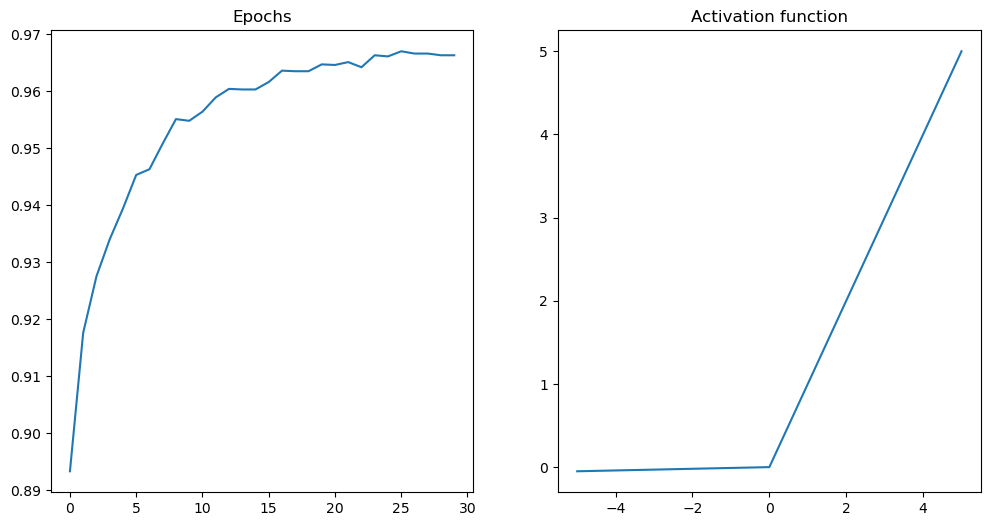

Predicted 9646/10000 correct
Accuracy: 0.9646


In [7]:
from activation_funtions import LeakyReLU


activation_function = LeakyReLU()
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)


# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

# Tanh

Tanh funktion kanssa huomasin, jos learning rate parametri on liian iso, tarkkuus opettamisen aikana pomppii holtittomasti. Tämä tarkoittaa, ettei se löydä minimiä vaan hyppii sen yli.

Epoch 0 done
Predicted 8771/10000
Epoch 1 done
Predicted 9019/10000
Epoch 2 done
Predicted 9100/10000
Epoch 3 done
Predicted 9153/10000
Epoch 4 done
Predicted 9192/10000
Epoch 5 done
Predicted 9236/10000
Epoch 6 done
Predicted 9270/10000
Epoch 7 done
Predicted 9281/10000
Epoch 8 done
Predicted 9321/10000
Epoch 9 done
Predicted 9321/10000
Epoch 10 done
Predicted 9340/10000
Epoch 11 done
Predicted 9363/10000
Epoch 12 done
Predicted 9385/10000
Epoch 13 done
Predicted 9389/10000
Epoch 14 done
Predicted 9401/10000
Epoch 15 done
Predicted 9428/10000
Epoch 16 done
Predicted 9427/10000
Epoch 17 done
Predicted 9444/10000
Epoch 18 done
Predicted 9443/10000
Epoch 19 done
Predicted 9461/10000
Epoch 20 done
Predicted 9474/10000
Epoch 21 done
Predicted 9462/10000
Epoch 22 done
Predicted 9462/10000
Epoch 23 done
Predicted 9481/10000
Epoch 24 done
Predicted 9485/10000
Epoch 25 done
Predicted 9485/10000
Epoch 26 done
Predicted 9497/10000
Epoch 27 done
Predicted 9490/10000
Epoch 28 done
Predicted 9483/1

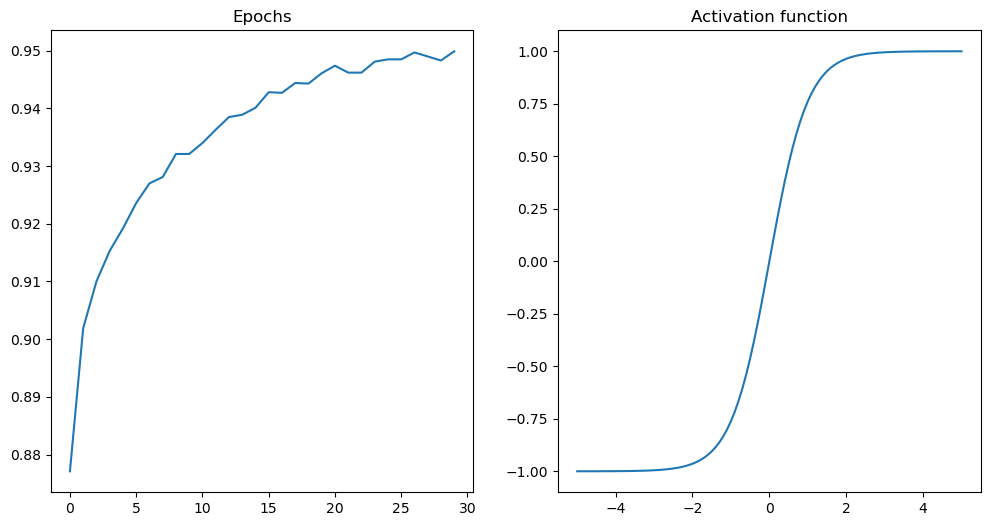

Predicted 9448/10000 correct
Accuracy: 0.9448


In [8]:
from activation_funtions import Tanh

activation_function = Tanh()
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plot_result(activation_function, evaluations)


# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

Kuitenkin, jos tanh funktiota skaalataan alpha arvolla 0.43, se muistuttaa sigmoid funktiota ja siten käyttäytyy kuten sigmoid. Näin isomalla learning rate parametrillä päätyvän lähellä minimiä, mutta silti hypitään sen yli puolelta toiselle.

Epoch 0 done
Predicted 9258/10000
Epoch 1 done
Predicted 9283/10000
Epoch 2 done
Predicted 9262/10000
Epoch 3 done
Predicted 9379/10000
Epoch 4 done
Predicted 9372/10000
Epoch 5 done
Predicted 9416/10000
Epoch 6 done
Predicted 9380/10000
Epoch 7 done
Predicted 9391/10000
Epoch 8 done
Predicted 9442/10000
Epoch 9 done
Predicted 9433/10000
Epoch 10 done
Predicted 9344/10000
Epoch 11 done
Predicted 9414/10000
Epoch 12 done
Predicted 9429/10000
Epoch 13 done
Predicted 9423/10000
Epoch 14 done
Predicted 9430/10000
Epoch 15 done
Predicted 9416/10000
Epoch 16 done
Predicted 9459/10000
Epoch 17 done
Predicted 9439/10000
Epoch 18 done
Predicted 9403/10000
Epoch 19 done
Predicted 9449/10000
Epoch 20 done
Predicted 9447/10000
Epoch 21 done
Predicted 9462/10000
Epoch 22 done
Predicted 9422/10000
Epoch 23 done
Predicted 9498/10000
Epoch 24 done
Predicted 9409/10000
Epoch 25 done
Predicted 9445/10000
Epoch 26 done
Predicted 9398/10000
Epoch 27 done
Predicted 9404/10000
Epoch 28 done
Predicted 9382/1

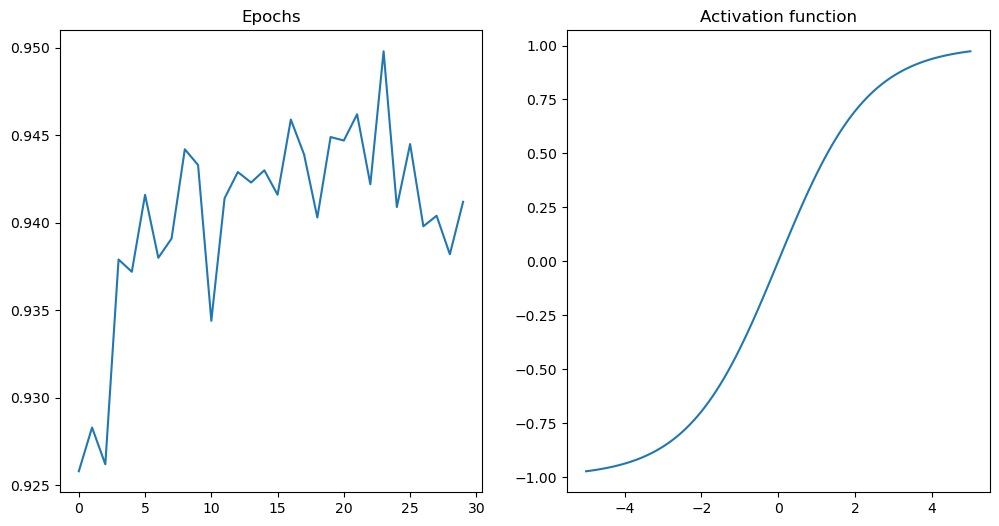

Predicted 9383/10000 correct
Accuracy: 0.9383


In [9]:
from activation_funtions import Tanh

activation_function = Tanh(alpha=0.43)
model = NeuralNetwork([784, 30, 16, 10], activation_function=activation_function)
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 1.0, 10)
plot_result(activation_function, evaluations)


# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)